In [ ]:
import imagepreprocessing.resizing as resizing
import imagepreprocessing.reading as reading
import numpy as np
from PIL import Image

In [ ]:
img = Image.open("/home/sari/Desktop/test-test-3/Object_Test_13.tif")
print img
img

In [ ]:
factor = 10
w, h  = img.size
print w
print h
res = img.resize((int(w*factor), int(h*factor)))
res

In [ ]:
resized = img.resize((28, 28))
imgarr = np.array(resized)
resized

In [ ]:
images = reading.read_images()
res_images = np.array([np.array(img.resize((30,30))) for img in images])
resh = res_images.reshape((res_images.shape[0],30, 30, 1))
print res_images.shape[0]
print resh.shape
print res_images[0][0][0]
print resh[0][0][0]

In [ ]:
classes = [2, 0, 1, 2, 2,
           1, 1, 2, 2, 0,
           1, 1, 2, 2, 2,
           2, 0, 2, 2, 2,
           2, 2, 2, 2, 0,
           1, 1, 2, 2, 2,
           0, 0, 1, 1, 2,
           2, 2, 2, 2, 2,
           2, 2, 2, 0, 0,
           1, 2, 0, 0, 2,
           2, 0, 2, 0, 1,
           2, 2, 0, 0, 0,
           2, 0, 0, 0, 0,
           2, 2, 2, 2, 2,
           2, 2, 0, 0, 2,
           2, 2, 0, 2, 2,
           2, 2, 2, 1, 1,
           2, 2, 2, 0, 0,
           2, 2, 1, 0, 0,
           1, 0, 0, 0, 0]
arr = np.array(classes)
print arr.shape
parsed = []
for c in classes:
    if c == 0:
        parsed.append([1,0,0])
    elif c == 1:
        parsed.append([0,1,0])
    elif c == 2:
        parsed.append([0,0,1])
arr = np.array(parsed)
print arr
arr[np.random.choice(len(parsed), 50), :]

In [ ]:
import tensorflow as tf

tf.set_random_seed(0)

# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/       -- fully connected layer (sigmoid)      W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/         -- fully connected layer (sigmoid)      W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/           -- fully connected layer (sigmoid)      W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/             -- fully connected layer (sigmoid)      W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 3])

# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.zeros([M]))
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.zeros([N]))
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.zeros([O]))
W5 = tf.Variable(tf.truncated_normal([O, 3], stddev=0.1))
B5 = tf.Variable(tf.zeros([3]))

# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training step, learning rate = 0.003
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    batch_X = reading.get_test_data()
    class_step = Y.eval(feed_dict={X: batch_X})
    print class_step
    print np.argmax(class_step, axis=1)
    sess.close()

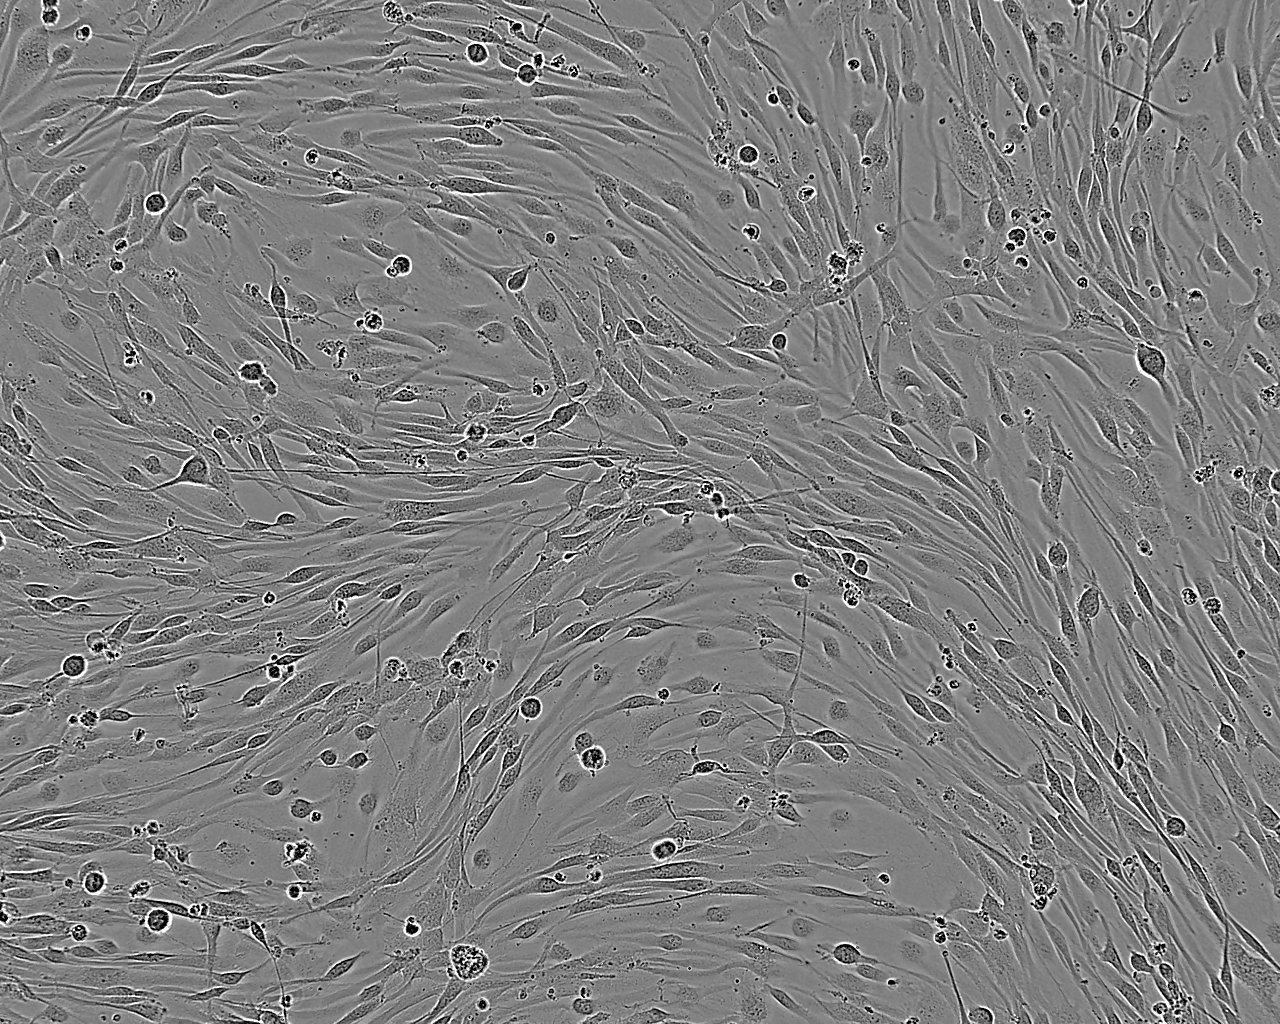

In [8]:
import urllib2
import cStringIO
from PIL import Image

asd = urllib2.urlopen("http://192.168.1.106:8000/G166-G179_G2_1_2010y04m22d_06h30m.tif").read()

asd = cStringIO.StringIO(asd)
img = Image.open(asd)
img

In [ ]:
saver = tf.train.Saver()
